<a href="https://colab.research.google.com/github/evageck/Data-Driven-Music-Insights/blob/main/Tame_Impala_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tameimpala = pd.read_csv('tame_impala_spotify.csv')
tameimpala.set_index(['name'], inplace=True)
tameimpala.sort_values(by='popularity', ascending=False, inplace=True)
tameimpala = pd.concat([tameimpala['popularity'], tameimpala.drop('popularity', axis=1)], axis=1)
tameimpala = tameimpala.drop(['Unnamed: 0','id','uri'], axis=1)
tameimpala['duration'] = tameimpala['duration_ms'] / 1000
tameimpala.drop(columns=['duration_ms'], inplace=True)
tameimpala.head(10)

,popularity,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
name,,,,,,,,,,,,,,
The Less I Know The Better,87,Currents,2015-07-17,7,0.01150,0.640,0.740,0.006780,0.1670,-4.083,0.0284,116.879,0.785,216.320
Borderline,84,The Slow Rush,2020-02-14,3,0.04060,0.621,0.873,0.000009,0.0824,-3.067,0.0369,97.960,0.873,237.800
"New Person, Same Old Mistakes",82,Currents,2015-07-17,13,0.27200,0.470,0.809,0.006710,0.0491,-6.740,0.0495,151.836,0.490,363.240
Let It Happen,82,Currents,2015-07-17,1,0.00462,0.602,0.881,0.026600,0.1110,-5.875,0.0443,125.012,0.577,467.586
Eventually,79,Currents,2015-07-17,5,0.01580,0.424,0.615,0.000389,0.0844,-6.217,0.0325,77.935,0.155,318.591
Feels Like We Only Go Backwards,78,Lonerism,2012-01-01,7,0.02770,0.303,0.900,0.635000,0.1100,-2.352,0.0574,149.508,0.491,192.960
Nangs,75,Currents,2015-07-17,2,0.15900,0.536,0.526,0.847000,0.1280,-9.754,0.1810,167.608,0.434,107.533
One More Hour,75,The Slow Rush,2020-02-14,12,0.10800,0.647,0.398,0.107000,0.1480,-8.630,0.0283,102.029,0.320,432.560
Elephant,74,Lonerism,2012-01-01,9,0.56200,0.598,0.553,0.157000,0.2570,-6.742,0.0397,123.075,0.533,211.226


In [3]:
album_tempo = round(tameimpala.groupby('album')['tempo'].mean(),2)
album_tempo

,tempo
album,
Currents,130.86
InnerSpeaker,128.07
Live Versions,131.80
Lonerism,127.51
The Slow Rush,128.06


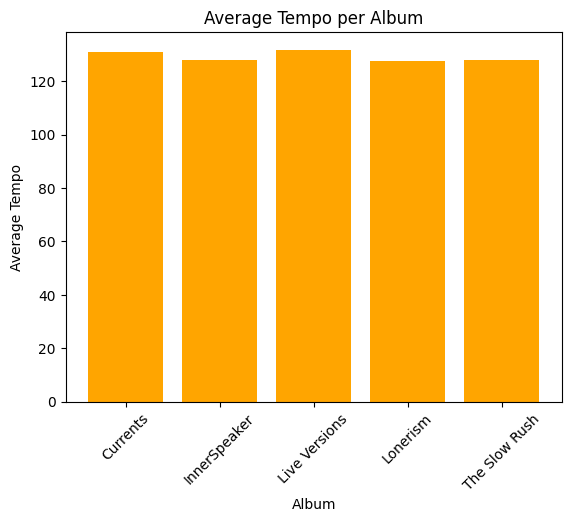

In [4]:
plt.bar(album_tempo.index, album_tempo, color='orange')
plt.title('Average Tempo per Album')
plt.xlabel('Album')
plt.ylabel('Average Tempo')
plt.xticks(rotation=45)
plt.show()

In [5]:
album_valence = round(tameimpala.groupby('album')['valence'].mean(),2)
album_valence

,valence
album,
Currents,0.47
InnerSpeaker,0.36
Live Versions,0.27
Lonerism,0.41
The Slow Rush,0.50


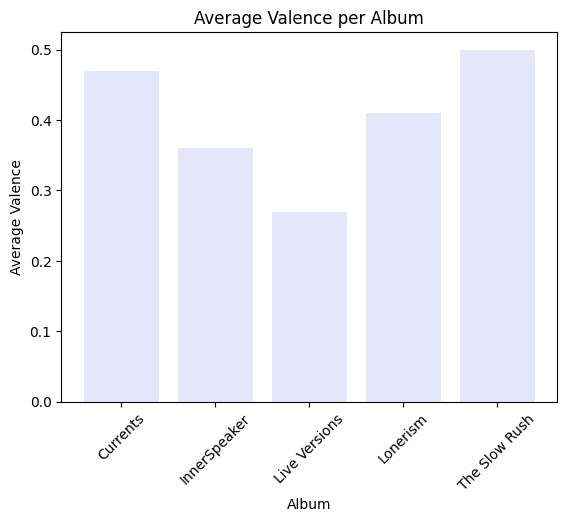

In [6]:
plt.bar(album_valence.index, album_valence, color='lavender')
plt.title('Average Valence per Album')
plt.xlabel('Album')
plt.ylabel('Average Valence')
plt.xticks(rotation=45)
plt.show()

In [8]:
#Allegro – fast, quickly and bright (109–132 BPM) Vivace – lively and fast (132–140 BPM) Presto – extremely fast (168–177 BPM) Prestissimo – even faster than Presto (178 BPM and over)
#https://symphonynovascotia.ca/faqs/symphony-101/how-do-musicians-know-how-fast-to-play-a-piece-and-why-are-the-terms-in-italian/#:~:text=Allegro%20%E2%80%93%20fast%2C%20quickly%20and%20bright,Presto%20(178%20BPM%20and%20over)

In [9]:
#Dandeability = a value of 0.0 is least danceable and 1.0 is most danceable.
#Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
result = round(tameimpala.groupby(['name', 'popularity']).agg({'danceability': 'mean', 'energy':'mean', 'valence':'mean'}).sort_values(by=('popularity'), ascending=False).head(10), 2)
result

,,danceability,energy,valence
name,popularity,,,
The Less I Know The Better,87,0.64,0.74,0.78
Borderline,84,0.62,0.87,0.87
Let It Happen,82,0.60,0.88,0.58
"New Person, Same Old Mistakes",82,0.47,0.81,0.49
Eventually,79,0.42,0.62,0.16
Feels Like We Only Go Backwards,78,0.30,0.90,0.49
One More Hour,75,0.65,0.40,0.32
Nangs,75,0.54,0.53,0.43
Elephant,74,0.60,0.55,0.53


In [10]:
round(result.mean(),2)

,0
danceability,0.56
energy,0.70
valence,0.53


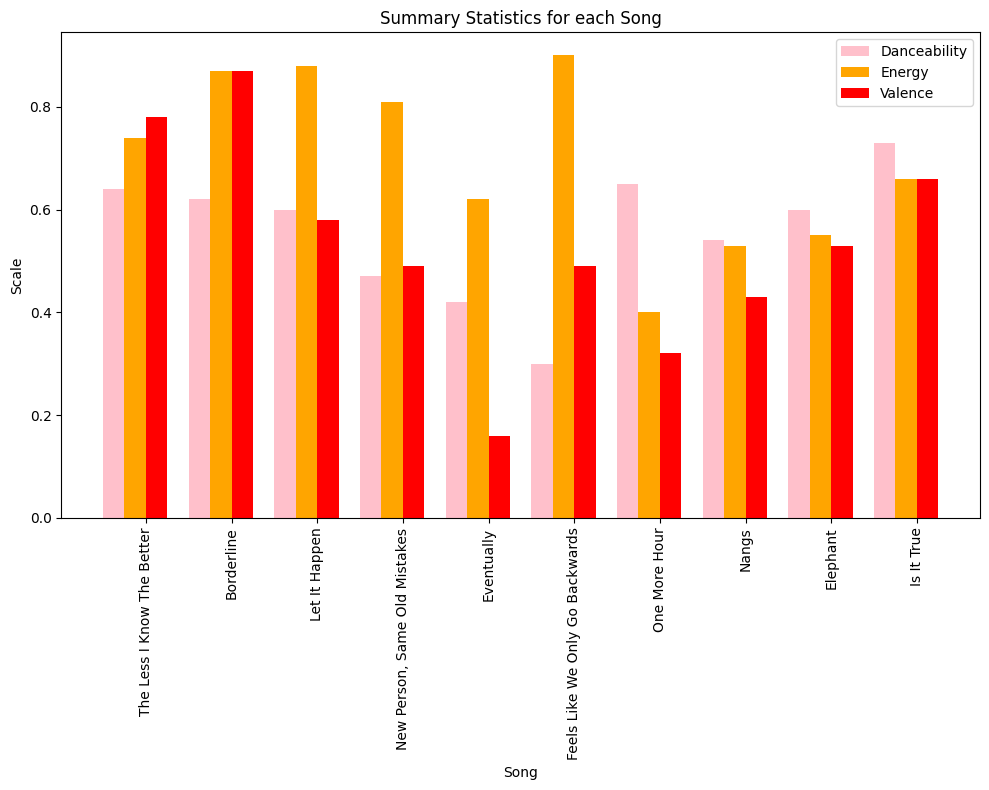

In [11]:
n = 7
ind = np.arange(10)
width = 0.25

plt.figure(figsize=(10, 8))

plt.bar(ind, result.danceability, width, color='pink', label='Danceability')
plt.bar(ind + width, result.energy, width, color='orange', label='Energy')
plt.bar(ind + 2 * width, result.valence, width, color='red', label='Valence')

plt.xticks(ind + 1.5 * width, ['The Less I Know The Better', 'Borderline', 'Let It Happen', 'New Person, Same Old Mistakes', 'Eventually', 'Feels Like We Only Go Backwards', 'One More Hour', 'Nangs', 'Elephant', 'Is It True'])

plt.xticks(rotation=90)
plt.title("Summary Statistics for each Song")
plt.xlabel('Song')
plt.ylabel('Scale')
plt.legend()
plt.tight_layout()
plt.show()

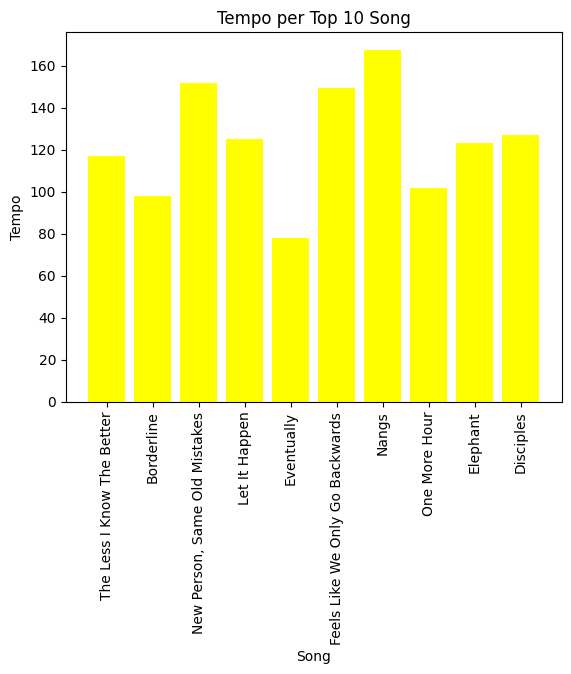

In [19]:
plt.bar(top_10.index, top_10.tempo, color='yellow')
plt.title('Tempo per Top 10 Song')
plt.xlabel('Song')
plt.ylabel('Tempo')
plt.xticks(rotation=90)
plt.show()

In [21]:
round(top_10.tempo.mean(), 2)

123.88

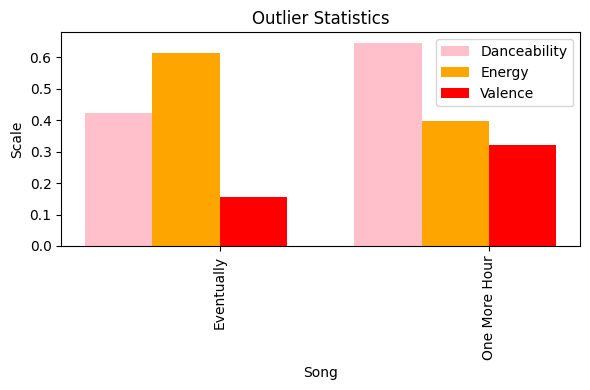

In [18]:
n = 7
ind = np.arange(2)
width = 0.25

plt.figure(figsize=(6, 4))

plt.bar(ind, slow.danceability, width, color='pink', label='Danceability')
plt.bar(ind + width, slow.energy, width, color='orange', label='Energy')
plt.bar(ind + 2 * width, slow.valence, width, color='red', label='Valence')

plt.xticks(ind + 1.5 * width, ['Eventually', 'One More Hour'])

plt.xticks(rotation=90)
plt.title("Outlier Statistics")
plt.xlabel('Song')
plt.ylabel('Scale')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
top_10 = tameimpala.head(10)[['danceability', 'energy', 'valence', 'duration', 'popularity','tempo']]
top_10

,danceability,energy,valence,duration,popularity,tempo
name,,,,,,
The Less I Know The Better,0.640,0.740,0.785,216.320,87,116.879
Borderline,0.621,0.873,0.873,237.800,84,97.960
"New Person, Same Old Mistakes",0.470,0.809,0.490,363.240,82,151.836
Let It Happen,0.602,0.881,0.577,467.586,82,125.012
Eventually,0.424,0.615,0.155,318.591,79,77.935
Feels Like We Only Go Backwards,0.303,0.900,0.491,192.960,78,149.508
Nangs,0.536,0.526,0.434,107.533,75,167.608
One More Hour,0.647,0.398,0.320,432.560,75,102.029
Elephant,0.598,0.553,0.533,211.226,74,123.075


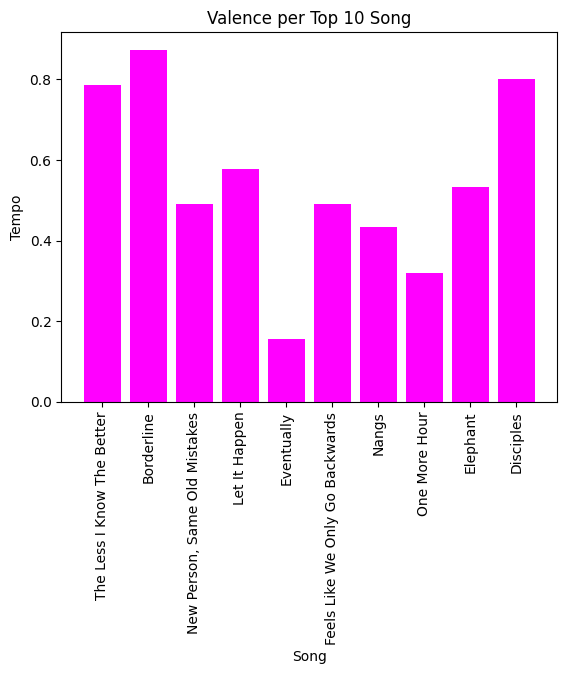

In [20]:
plt.bar(top_10.index, top_10.valence, color='magenta')
plt.title('Valence per Top 10 Song')
plt.xlabel('Song')
plt.ylabel('Tempo')
plt.xticks(rotation=90)
plt.show()

In [15]:
#eventually
#slow = tempo[['tempo','energy','valence']]
#slow

In [14]:
slow = tameimpala.loc[['Eventually','One More Hour']].drop(['track_number','release_date'], axis=1)
slow

,popularity,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
name,,,,,,,,,,,,
Eventually,79,Currents,0.0158,0.424,0.615,0.000389,0.0844,-6.217,0.0325,77.935,0.155,318.591
One More Hour,75,The Slow Rush,0.1080,0.647,0.398,0.107000,0.1480,-8.630,0.0283,102.029,0.320,432.560
